<a href="https://colab.research.google.com/github/underdarks/underdarks/blob/main/%EB%B3%B4%ED%97%98%EB%A3%8C_%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split #사이킷런

In [ ]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)

type(data)
data.info()
round(data.describe(),2) #소수 2재짜리까지만 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


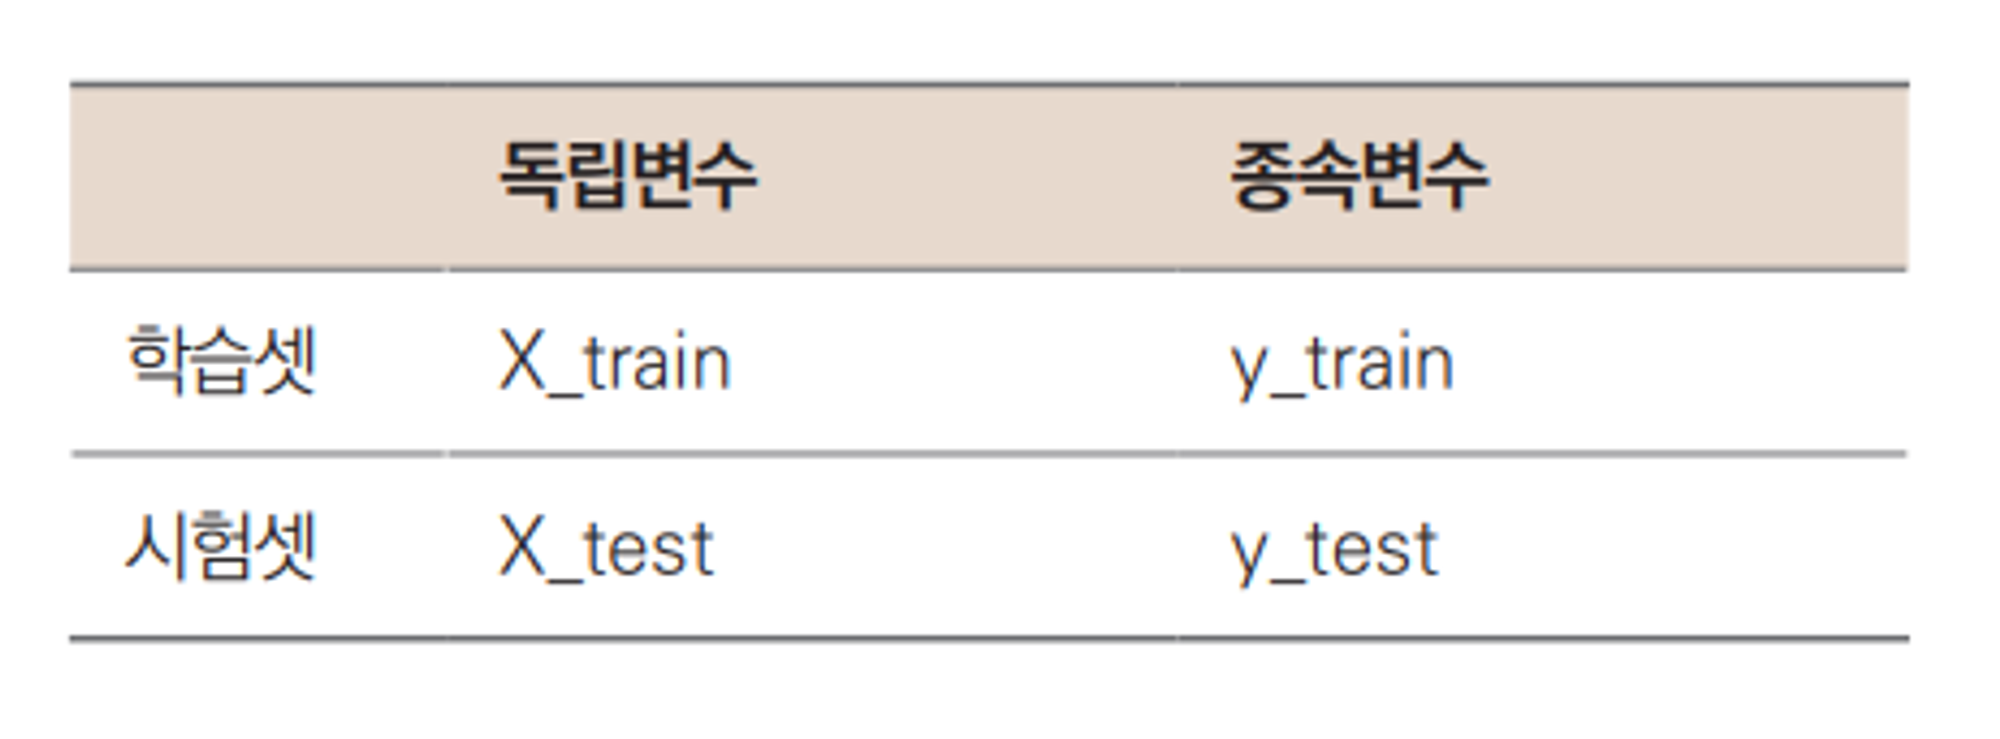

In [ ]:
#데이터셋 나누기
X = data[['age','sex','bmi','children','smoker']] #독립변수(원인)
y = data['charges'] #종속변수

#데이터셋 분할(아래그림 참고)
'''
train_test_split은 트레이닝 Set, 테스트 Set를 나누는 함수이다.
  -X: 특성 데이터(입력 데이터)를 나타냅니다.
  -y: 타겟 데이터(출력 데이터)를 나타냅니다.
  -test_size: 테스트 세트의 비율을 결정합니다. 일반적으로 0.2 또는 0.3과 같은 값이 사용됩니다. 예를 들어, test_size=0.2는 전체 데이터의 20%를 테스트 세트로 사용합니다.
  -random_state: 랜덤 샘플링으로 데이터를 특정 비율로 나눌 때 마구잡이로 뒤섞어서 나눈다. -> 매번 실행할 때마다 train_set과 train_set에 들어가는 데이터가 달라진다.
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

from sklearn.linear_model import LinearRegression

#모델 생성
model = LinearRegression()


#모델 학습(여기서 학습이란, 데이터를 모델 안에 넣어서 독립변수와 종속변수 간의 관계들을 분석해 새로운 데이터를 예측하는 상태로 만드는것)
#model.fit(독립변수, 종속변수)
model.fit(X_train,y_train) #선형회귀 모델에 학습 독립변수와 학습 종속변수를 넣는다
pred = model.predict(X_test) #시험 독립변수(t_test)를 모델에 넣어 값을 예측한다.
#print(pred)

#독립변수 계수보기
print(pd.Series(model.coef_,index=X.columns))

#y절편
#charges(y)=264.7*age + 17.3*sex + 297.5*bmi + 469.3*children + 23469.3*smoker -11576.9(y절편)
print('y 절편: ', model.intercept_)


age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64
y 절편:  -11576.999976112367


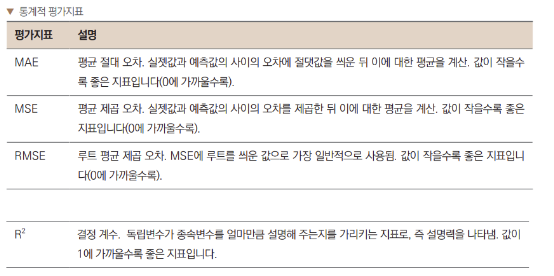

In [ ]:
#예측 모델 평가하기

#1. 테이블로 평가하기
comparison = pd.DataFrame({'actual':y_test,'pred':pred}) #train set 종속변수와 예측값을 비교한다
print('comparison = ',comparison)

#2. 그래프로 평가하기
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10,10)) #그래프 크기 정의
#sb.scatterplot(x='actual',y='pred', data=comparison)

#3. 통계적인 방법으로 평가하기(RMSE, 위표 참고)
#연속형 변수를 예측하고 평가할 때 가장 흔하게 쓰이는 RMSE(Root Mean Squared Error, 루트 평균 제곱근 오차, 평균 제곱근 오차)
from sklearn.metrics import mean_squared_error #MSE 라이브러리

rmse = mean_squared_error(y_test,pred) **0.5 #RMSE 계산 실행
print('RMSE = ',rmse)

#R^2 = SSR/SST = 즉, 평균값으로 넣었을 때, 예측값(평균값)과 실제값의 차이 중 모델이 얼마만큼 비율로 실제값에 가깝게 예측하는 의미한다.
#R^2이 최대 1까지 나올 수 있으며, 좋은 모델일수록 1에 가깝고 0.7~0.8 이상이면 일반적인 수치이다.
#실제 RMSE와 R2으로 평가를 한다.
r2score = model.score(X_train, y_train)
print('R^2 = ', r2score)



comparison =             actual          pred
12     1826.84300   4765.249466
306   20177.67113   4957.730865
318    7421.19455   8298.988153
815    1877.92940   3078.811868
157   15518.18025  24165.956542
...           ...           ...
713    1984.45330   5776.764928
1282  14283.45940  23102.847340
531   14043.47670  14280.732585
537    8825.08600  10527.417291
1015  12124.99240  11638.260006

[268 rows x 2 columns]
RMSE =  5684.927776334485
score =  0.7368220127747351


<Figure size 1000x1000 with 0 Axes>